Here we import the MRI and save them like a .npz array

In [12]:
import pandas as pd
import numpy as np
from os.path import dirname, join
RAW_DATA_DIR_PATH= r"/home/ubuntu/giorgio/v311/FeTa_challenge_2024/"
np.load(join(RAW_DATA_DIR_PATH, "nii_data.npy"))


array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],

         ...,

         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0.

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
n_patients=40
data=[]
for i in range(n_patients):
    path = rf'D:\Feta\Institution 2 - Medical University of Vienna\FeTA2024_TrainingData_MedicalUniversityOfVienna_V2.0\sub-{101+i}\anat\sub-{101+i}_rec-nmic_T2w.nii.gz'
    my_img  = nib.load(path)
    nii_data = my_img.get_fdata()
    nii_aff  = my_img.affine
    nii_hdr  = my_img.header
    data.append(np.expand_dims(nii_data, axis=0)) #Adding the channel dimension
data=np.stack(data)
if (data.shape[0]==n_patients):
    np.save('nii_data.npy', data)


FileNotFoundError: No such file or no access: 'D:\Feta\Institution 2 - Medical University of Vienna\FeTA2024_TrainingData_MedicalUniversityOfVienna_V2.0\sub-101\anat\sub-101_rec-nmic_T2w.nii.gz'

In [4]:
data.shape

(40, 1, 256, 256, 256)

To PLOT

[[-9.45438921e-01 -2.90904284e-01  1.46696746e-01  1.37806198e+02]
 [-2.94085830e-01  9.55779016e-01  3.49044682e-10 -7.98751373e+01]
 [-1.40209675e-01 -4.31414358e-02 -9.89181519e-01  1.31639862e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 256 256 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip      

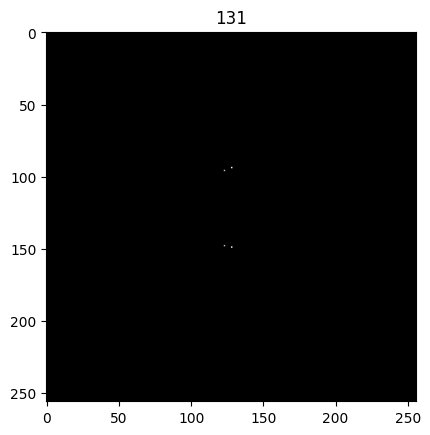

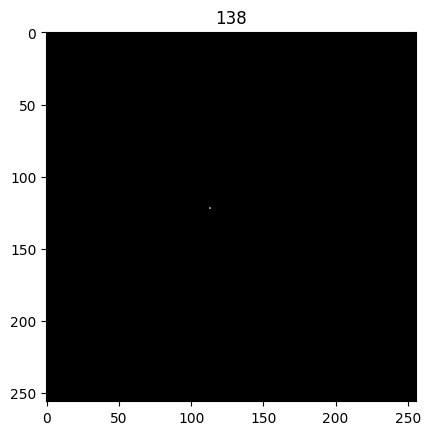

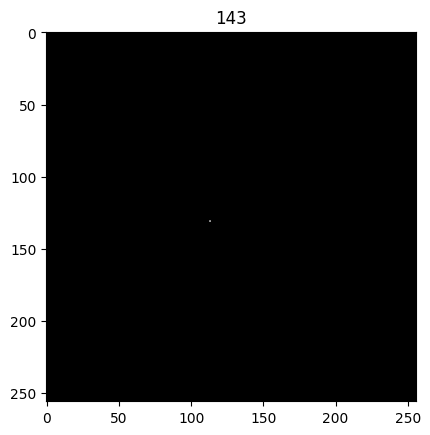

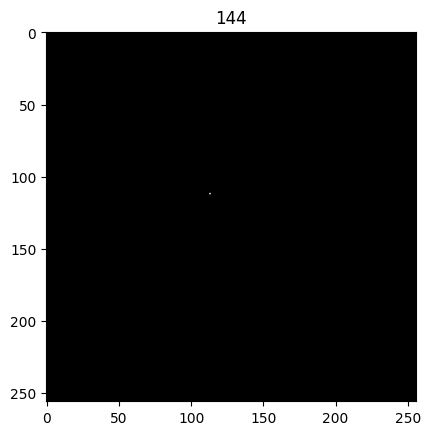

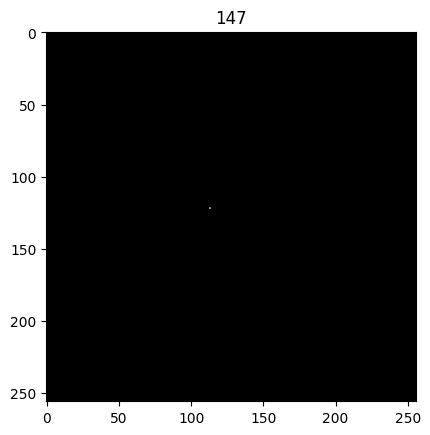

In [8]:
import nibabel as nib
import matplotlib.pyplot as plt

# Change the path to your path
path = r'D:\Feta\Institution 2 - Medical University of Vienna\FeTA2024_TrainingData_MedicalUniversityOfVienna_V2.0\derivatives\biometry\sub-101\anat\sub-101_rec-nmic_meas.nii.gz'
my_img  = nib.load(path)
nii_data = my_img.get_fdata()
nii_aff  = my_img.affine
nii_hdr  = my_img.header
print(nii_aff ,'\n',nii_hdr)
print(nii_data.shape)
if(len(nii_data.shape)==3):
   for slice_Number in range(nii_data.shape[2]):
       if np.sum(nii_data[:,:,slice_Number])!=0:
        plt.imshow(nii_data[:,:,slice_Number],cmap='gray')
        plt.title(slice_Number)
        plt.show()
if(len(nii_data.shape)==4):
   for frame in range(nii_data.shape[3]):
       for slice_Number in range(nii_data.shape[2]):
           plt.imshow(nii_data[:,:,slice_Number,frame],cmap='gray')
           plt.show()

About the Lables

In [9]:
# Find the positions of the non-zero elements
non_zero_positions = np.nonzero(nii_data)

# non_zero_positions is a tuple of arrays (x, y, z positions)
x_positions, y_positions, z_positions = non_zero_positions

# Combine these into a single array of coordinates
coordinates = np.column_stack(non_zero_positions)

# Print the coordinates
print(coordinates)

values = nii_data[non_zero_positions]

# Combine the coordinates and values
coordinates_and_values = np.column_stack((x_positions, y_positions, z_positions, values))

# Print the coordinates and values
for coord in coordinates_and_values:
    print(f"Coordinate: ({coord[0]}, {coord[1]}, {coord[2]}) - Value: {coord[3]}")

[[ 94 128 131]
 [ 96 123 131]
 [112 113 144]
 [122 113 138]
 [122 113 147]
 [131 113 143]
 [148 123 131]
 [149 128 131]]
Coordinate: (94.0, 128.0, 131.0) - Value: 4.0
Coordinate: (96.0, 123.0, 131.0) - Value: 3.0
Coordinate: (112.0, 113.0, 144.0) - Value: 5.0
Coordinate: (122.0, 113.0, 138.0) - Value: 2.0
Coordinate: (122.0, 113.0, 147.0) - Value: 2.0
Coordinate: (131.0, 113.0, 143.0) - Value: 5.0
Coordinate: (148.0, 123.0, 131.0) - Value: 3.0
Coordinate: (149.0, 128.0, 131.0) - Value: 4.0


Here we are creating an array for the Groundtruth coordinates and values.

In [29]:
biometry=[]
missing_label=[[0,0,0, 1],[0,0,0,1]]
n_patients=40
for i in range(n_patients):
    path = rf'D:\Feta\Institution 2 - Medical University of Vienna\FeTA2024_TrainingData_MedicalUniversityOfVienna_V2.0\derivatives\biometry\sub-{101+i}\anat\sub-{101+i}_rec-nmic_meas.nii.gz'
    my_img  = nib.load(path)
    nii_data = my_img.get_fdata()
    nii_aff  = my_img.affine
    nii_hdr  = my_img.header

    # Find the positions of the non-zero elements
    non_zero_positions = np.nonzero(nii_data) 

    #Labels for each biometry measure 
    values = nii_data[non_zero_positions]

    # non_zero_positions is a tuple of arrays (x, y, z positions)
    x_positions, y_positions, z_positions = non_zero_positions

    # Combine the coordinates and values
    coordinates_and_values = np.column_stack((x_positions, y_positions, z_positions, values))
    if coordinates_and_values.shape!=(10,4):  #dovrei fare un check diretto sul label mancante e per ogni label aggiungere la coppia di vettori corrispondente al label
        coordinates_and_values=np.append(coordinates_and_values,missing_label,axis=0)
    coordinates_and_values = coordinates_and_values[coordinates_and_values[:, -1].argsort()]
    biometry.append(coordinates_and_values)
    
biometry=np.stack(biometry)
if (biometry.shape[0]==n_patients):
    np.save('biometry_data.npy', biometry)

In [30]:
biometry[1]

array([[115., 128., 115.,   1.],
       [133., 128., 117.,   1.],
       [131., 128., 144.,   2.],
       [132., 128., 136.,   2.],
       [129., 149., 118.,   3.],
       [130., 107., 118.,   3.],
       [122., 151., 118.,   4.],
       [124., 104., 118.,   4.],
       [131., 121., 141.,   5.],
       [131., 137., 141.,   5.]])

In [63]:
for i, bio in enumerate(biometry):
    print("the patient", i, "hase a shape of:", bio.shape)

the patient 0 hase a shape of: (10, 4)
the patient 1 hase a shape of: (10, 4)
the patient 2 hase a shape of: (10, 4)
the patient 3 hase a shape of: (10, 4)
the patient 4 hase a shape of: (10, 4)
the patient 5 hase a shape of: (10, 4)
the patient 6 hase a shape of: (10, 4)
the patient 7 hase a shape of: (10, 4)
the patient 8 hase a shape of: (10, 4)
the patient 9 hase a shape of: (10, 4)
the patient 10 hase a shape of: (10, 4)
the patient 11 hase a shape of: (10, 4)
the patient 12 hase a shape of: (10, 4)
the patient 13 hase a shape of: (10, 4)
the patient 14 hase a shape of: (10, 4)
the patient 15 hase a shape of: (10, 4)
the patient 16 hase a shape of: (10, 4)
the patient 17 hase a shape of: (10, 4)
the patient 18 hase a shape of: (10, 4)
the patient 19 hase a shape of: (10, 4)
the patient 20 hase a shape of: (10, 4)
the patient 21 hase a shape of: (10, 4)
the patient 22 hase a shape of: (10, 4)
the patient 23 hase a shape of: (10, 4)
the patient 24 hase a shape of: (10, 4)
the patien

Ci sono pazienti (0-2-6 vienna) che non hanno tutte le lables, quella mancante è la 1-LCC, length of the corpus callosum

TO PRINT THE BIOMETRY

In [51]:
color_dict = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple'
}


In [53]:
color_dict[0]

'red'

[[105. 128. 124.   1.]
 [129. 128. 127.   1.]
 [131. 128. 152.   2.]
 [132. 128. 142.   2.]
 [127. 153. 127.   3.]
 [128. 105. 127.   3.]
 [115. 156. 127.   4.]
 [117. 100. 127.   4.]
 [128. 119. 150.   5.]
 [128. 142. 150.   5.]]


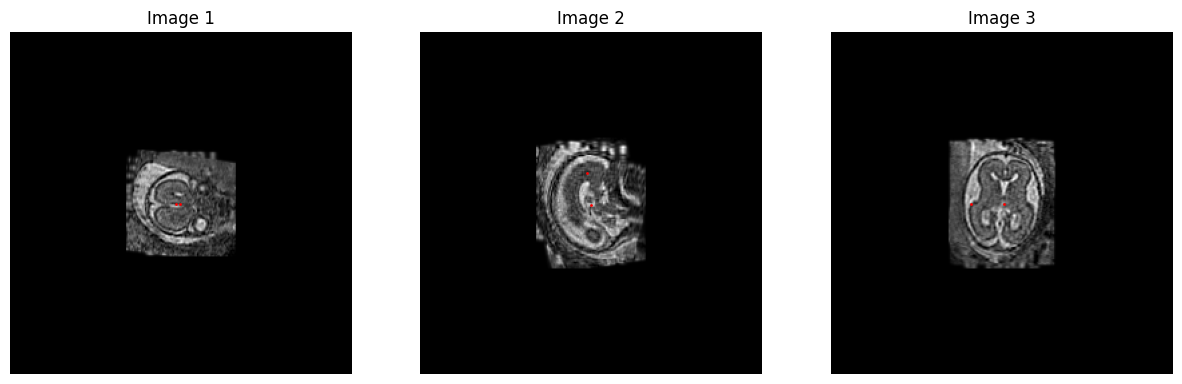

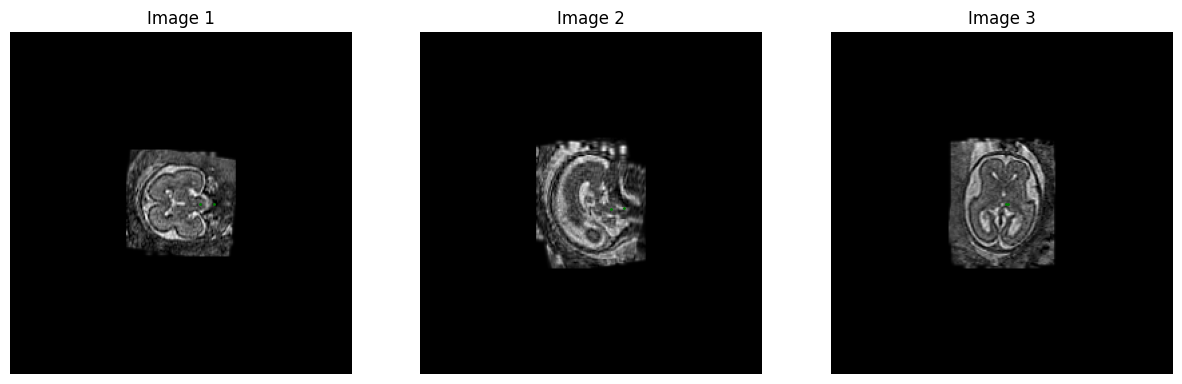

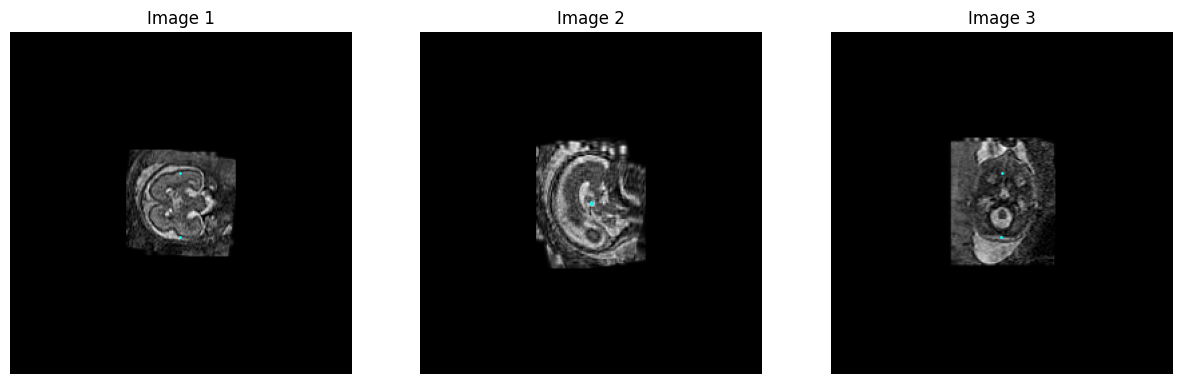

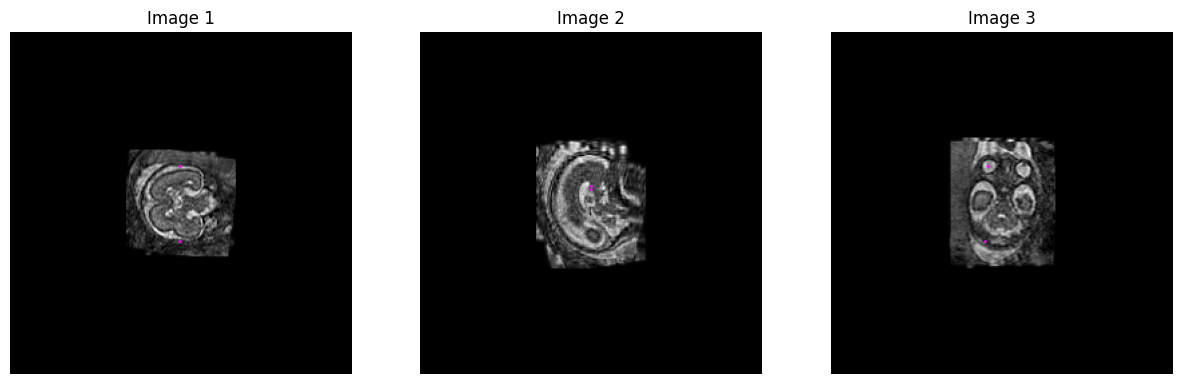

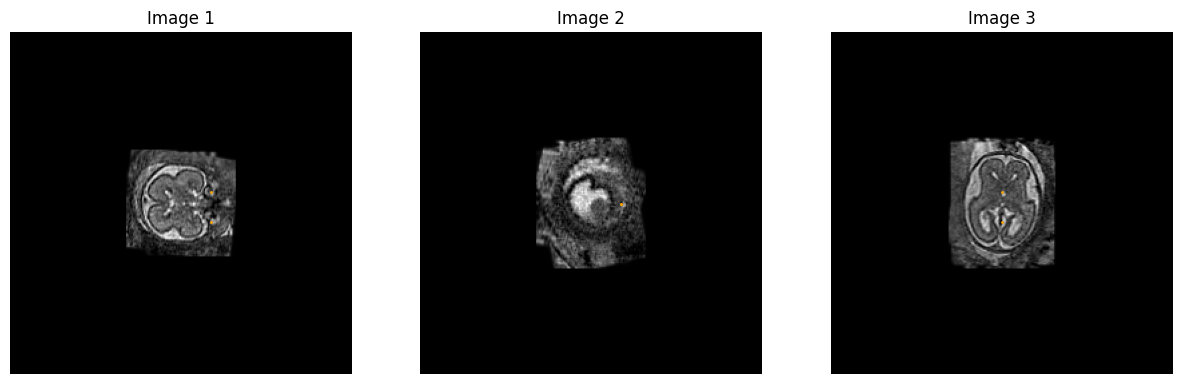

In [74]:
patient=17
x_positions=biometry[patient,:,0]
y_positions=biometry[patient,:,1]
z_positions=biometry[patient,:,2]
# Create a 1x3 grid of subplots

print(biometry[patient,:,:])
color_dict = {
    0: 'red',
    1: 'green',
    2: 'cyan',
    3: 'magenta',
    4: 'orange'
}

# Display each image in a subplot
for i in range(5):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(data[patient,0,int(x_positions[i]),:,:],cmap='gray')
    axs[0].set_title('Image 1')
    axs[0].axis('off')  # Turn off axis
    axs[0].scatter(z_positions[2*i],y_positions[2*i], c=color_dict[i], s=1)
    axs[0].scatter(z_positions[2*i+1],y_positions[2*i+1], c=color_dict[i], s=1)
    #axs[0].scatter(5,256-250, c=color_dict[2], s=1)

    axs[1].imshow(data[patient,0,:,int(y_positions[i]),:],cmap='gray')
    axs[1].set_title('Image 2')
    axs[1].axis('off')  # Turn off axis
    axs[1].scatter(z_positions[2*i],x_positions[2*i], c=color_dict[i], s=1)
    axs[1].scatter(z_positions[2*i+1],x_positions[2*i+1], c=color_dict[i], s=1)

    axs[2].imshow(data[patient,0,:,:,int(z_positions[i])],cmap='gray')
    axs[2].set_title('Image 3')
    axs[2].axis('off')  # Turn off axis
    axs[2].scatter(x_positions[2*i],y_positions[2*i], c=color_dict[i], s=1)
    axs[2].scatter(x_positions[2*i+1],y_positions[2*i+1], c=color_dict[i], s=1)

    # Display the plot
    plt.show()
